# Import libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Data From CSV File

In [2]:
df = pd.read_csv("world-happiness-report-2022.csv")
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


# EDA - Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [4]:
df.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [5]:
df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [6]:
df.corr()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,1.000000,-0.980856,-0.978345,-0.982031,-0.444633,-0.792137,-0.773773,-0.750945,-0.623040,-0.032831,-0.403199
Happiness score,-0.980856,1.000000,0.999333,0.999383,0.498990,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
Whisker-high,-0.978345,0.999333,1.000000,0.997434,0.514099,0.752104,0.773375,0.727611,0.622934,0.065728,0.413718
Whisker-low,-0.982031,0.999383,0.997434,1.000000,0.483762,0.773844,0.781302,0.751530,0.625926,0.061820,0.418162
Dystopia (1.83) + residual,-0.444633,0.498990,0.514099,0.483762,1.000000,-0.073423,0.083606,-0.006886,0.117695,0.066915,-0.051075
Explained by: GDP per capita,-0.792137,0.763677,0.752104,0.773844,-0.073423,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
Explained by: Social support,-0.773773,0.777889,0.773375,0.781302,0.083606,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
Explained by: Healthy life expectancy,-0.750945,0.740260,0.727611,0.751530,-0.006886,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
Explained by: Freedom to make life choices,-0.623040,0.624822,0.622934,0.625926,0.117695,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474
Explained by: Generosity,-0.032831,0.063785,0.065728,0.061820,0.066915,-0.164472,-0.002339,-0.098133,0.176800,1.000000,0.096107


<AxesSubplot:>

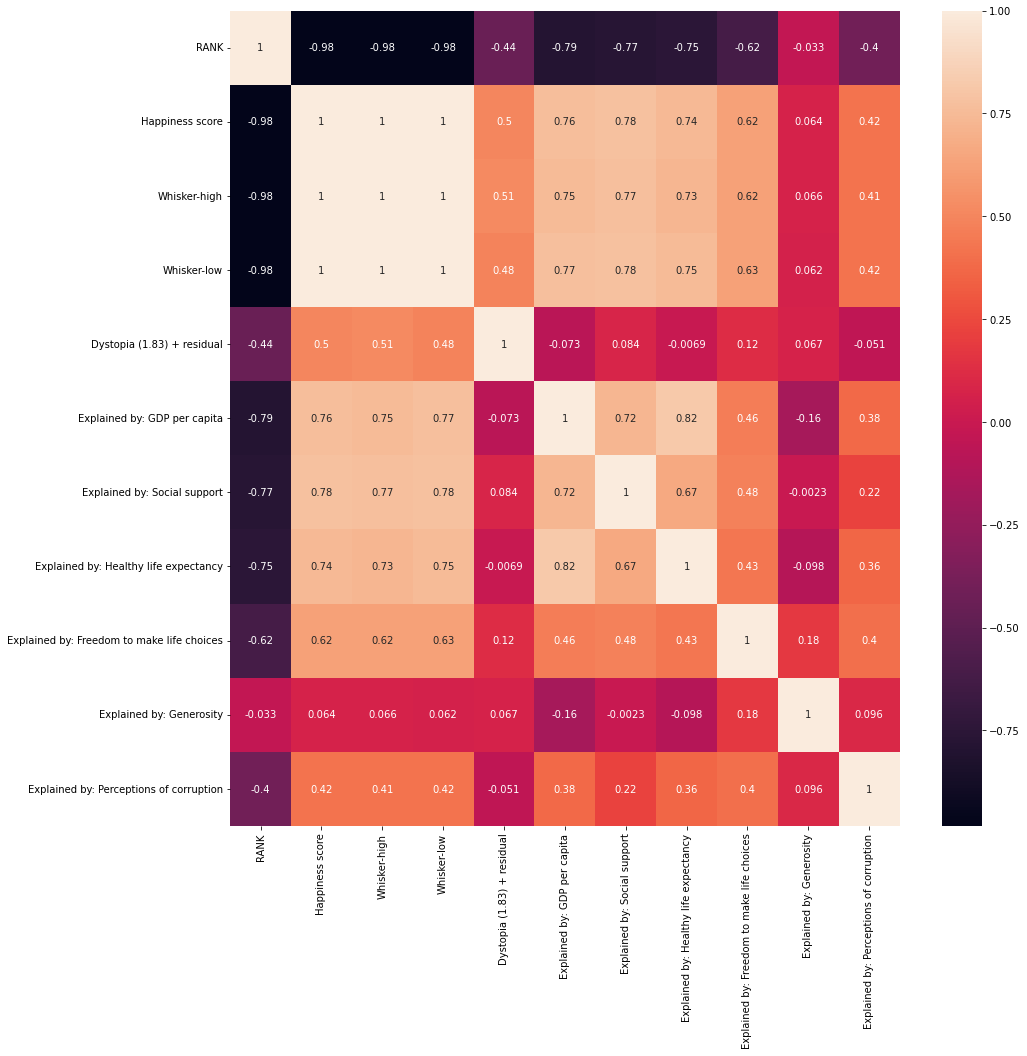

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [8]:
country_name='Indonesia'
country_rank=df[df['Country']==country_name]['RANK'].values[0]
print(f"{country_name}'s Rank:{country_rank}")

Indonesia's Rank:87


# Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Happiness score'),
  Text(1, 0, 'Whisker-high'),
  Text(2, 0, 'Whisker-low'),
  Text(3, 0, 'Dystopia (1.83) + residual'),
  Text(4, 0, 'Explained by: GDP per capita'),
  Text(5, 0, 'Explained by: Social support'),
  Text(6, 0, 'Explained by: Healthy life expectancy'),
  Text(7, 0, 'Explained by: Freedom to make life choices'),
  Text(8, 0, 'Explained by: Generosity'),
  Text(9, 0, 'Explained by: Perceptions of corruption')])

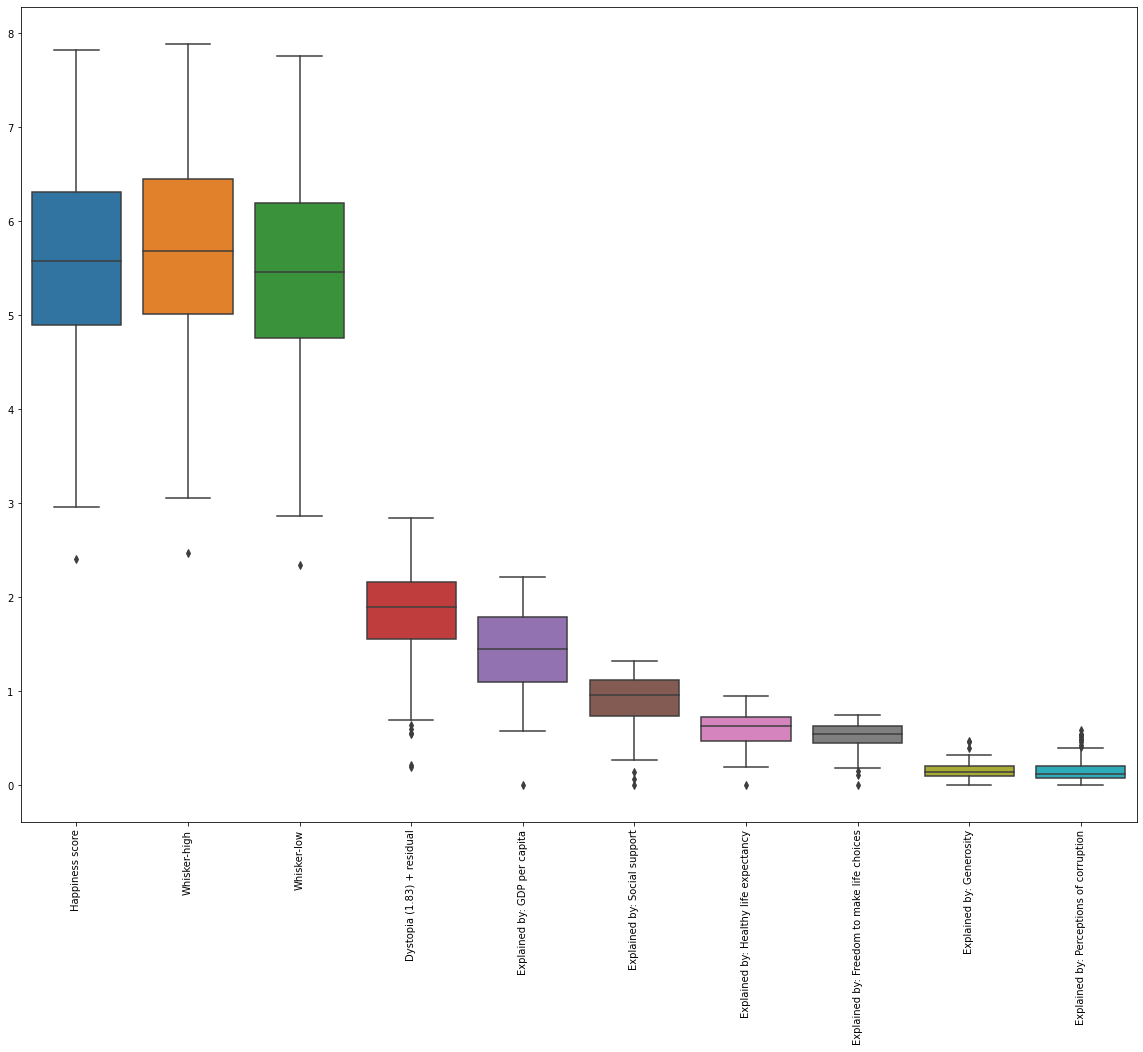

In [9]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df.iloc[:,1:])
plt.xticks(rotation=90)

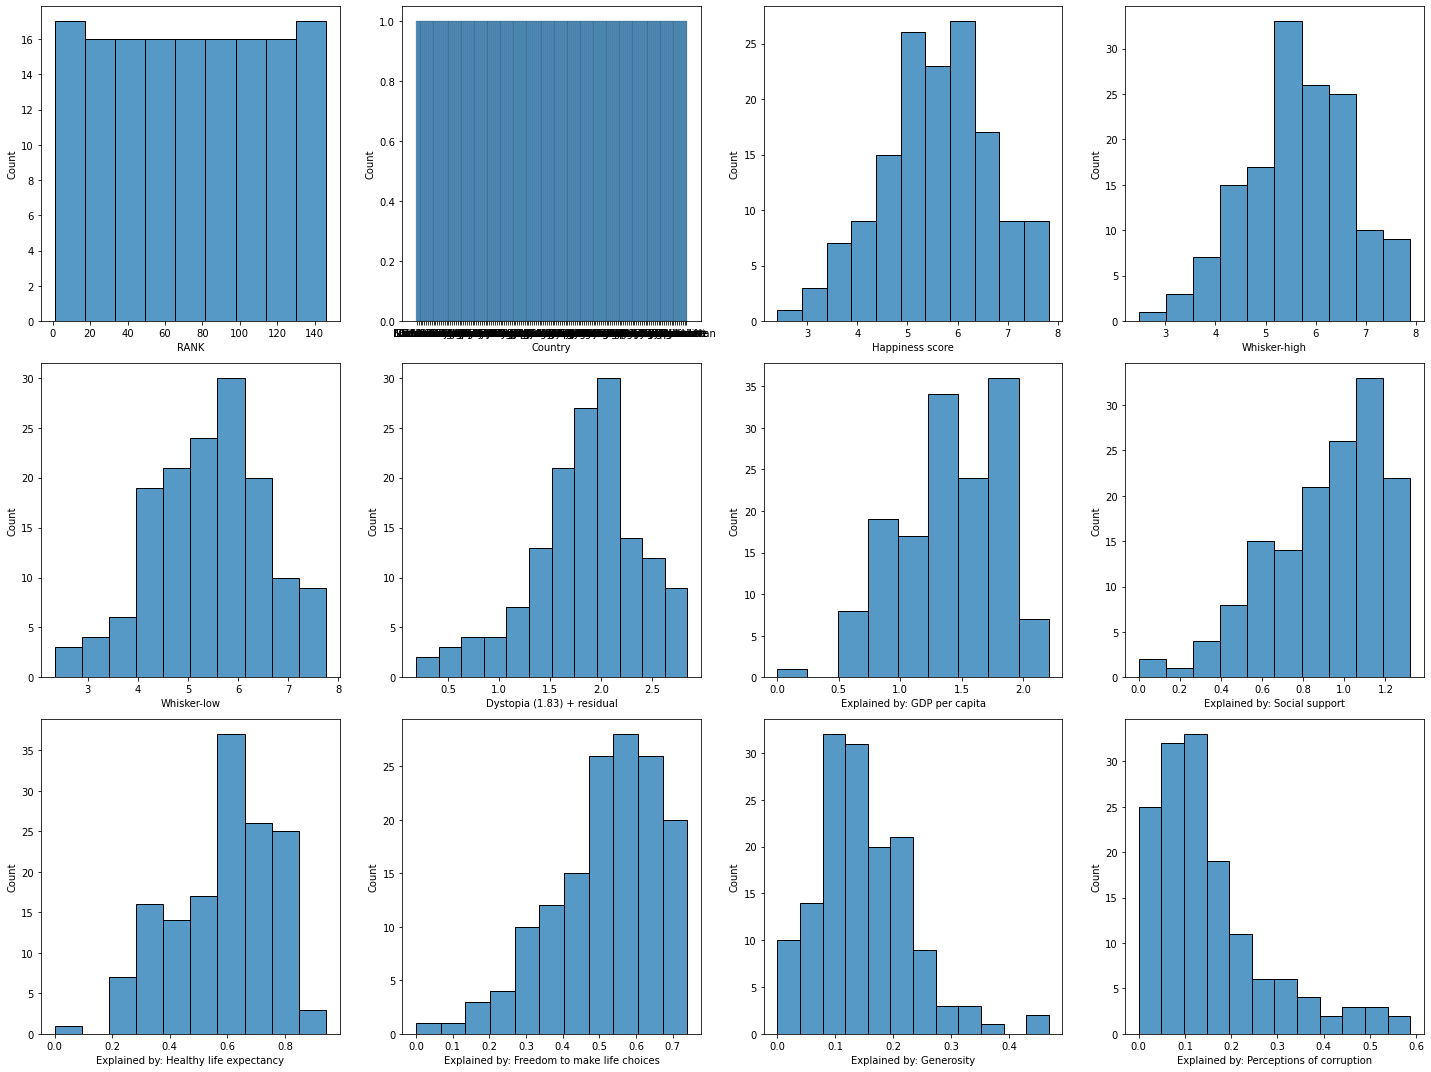

In [10]:
num_rows = (len(df.columns) + 2) // 4
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20,15))

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()

# Elbow Method and KMeans for Clustering

In [11]:
x=df.iloc[:,2:]
x.head()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


## Elbow Method

In [12]:
allscore = []
allclusters = []
distances = []

def clust(n):
    for i in range(1,n+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        distance=model.inertia_
        print("Cluster", i, "score:", score)
        allscore.append(score)
        allclusters.append(i)
        distances.append(distance)
clust(10)

Cluster 2 score: 0.4952130074484463
Cluster 3 score: 0.40556156081057976
Cluster 4 score: 0.4035982419546649
Cluster 5 score: 0.39244730778366355
Cluster 6 score: 0.3911317399987799
Cluster 7 score: 0.34724069811348435
Cluster 8 score: 0.340464557100911
Cluster 9 score: 0.33897456215307475
Cluster 10 score: 0.31364731921236116
Cluster 11 score: 0.2875759072938855


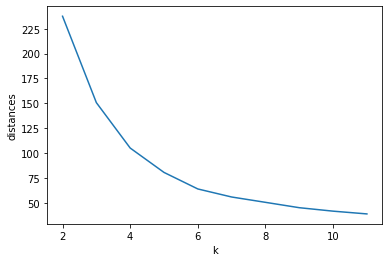

In [13]:
plt.xlabel("k")
plt.ylabel("distances")
plt.plot(allclusters, distances)

## KMeans

In [14]:
cluster_labels = KMeans(n_clusters=3).fit_predict(x)
df['cluster'] = cluster_labels
print("Silhouette Score: ", silhouette_score(x, cluster_labels))

Silhouette Score:  0.40556156081057976


[Text(0, 0, '56'), Text(0, 0, '55'), Text(0, 0, '35')]

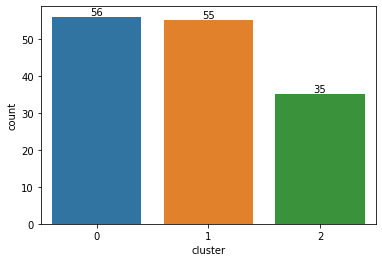

In [17]:
ax=sns.countplot(x=df.cluster)
ax.bar_label(ax.containers[0])

# Plotting end results in Scatter Diagrams

<AxesSubplot:xlabel='Happiness score', ylabel='Explained by: GDP per capita'>

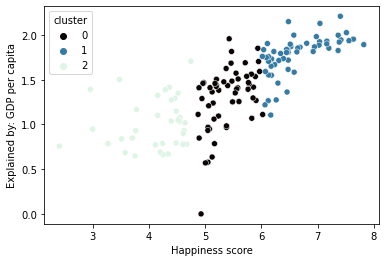

In [20]:
sns.scatterplot(x='Happiness score', y='Explained by: GDP per capita', palette='mako', hue='cluster', data=df)

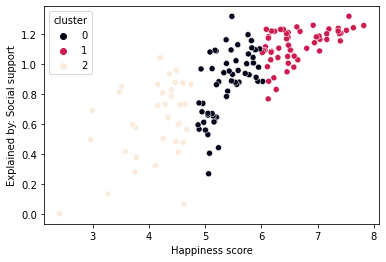

In [23]:
sns.scatterplot(x='Happiness score', y='Explained by: Social support',palette="rocket", hue='cluster', data=df);

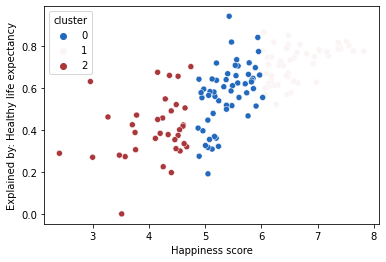

In [24]:
sns.scatterplot(x='Happiness score', y='Explained by: Healthy life expectancy',palette="vlag", hue='cluster', data=df);

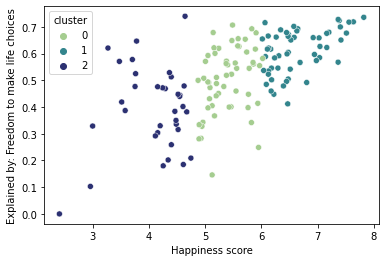

In [25]:
sns.scatterplot(x='Happiness score', y='Explained by: Freedom to make life choices',palette="crest", hue='cluster', data=df);

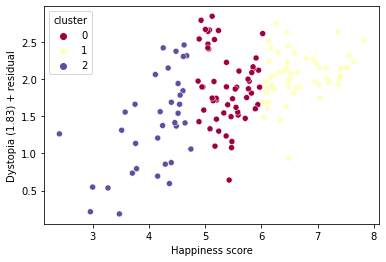

In [26]:
sns.scatterplot(x='Happiness score', y='Dystopia (1.83) + residual',palette="Spectral", hue='cluster', data=df);

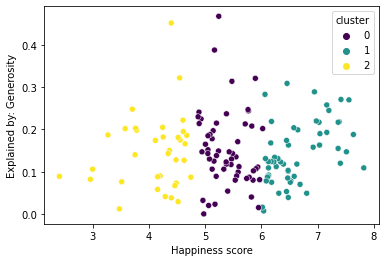

In [27]:
sns.scatterplot(x='Happiness score', y='Explained by: Generosity',palette="viridis", hue='cluster', data=df);

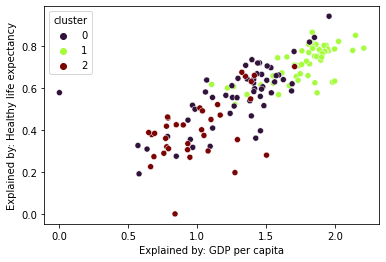

In [28]:
sns.scatterplot(x='Explained by: GDP per capita', y='Explained by: Healthy life expectancy',palette="turbo", hue='cluster', data=df);

# GIS - Geographic Info Systems

In [29]:
!pip install plotly

In [30]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [31]:
data=dict(
    type="choropleth",
    colorscale='aggrnyl',
    reversescale=True,
    locations=df['Country'],
    locationmode="country names",
    z=df["cluster"],
    text=df["Country"], 
    colorbar={'title':'Cluster Groups'}  
)

layout=dict(title='Cluster Groups around the World',
            geo=dict(showframe=False,projection={'type':'mercator'})
           )

In [32]:
choromap=go.Figure(data=data,layout=layout)
iplot(choromap, validate=False)